In [2]:
# Some imports
import insightface
import urllib
import urllib.request
import cv2
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Some function

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return im_rgb


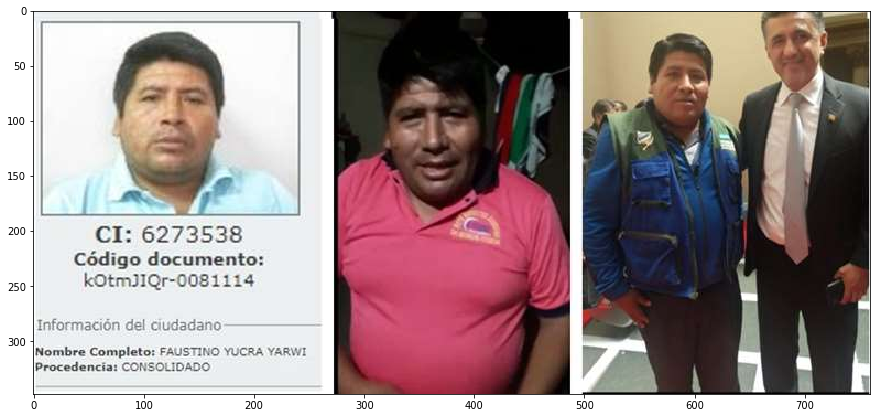

In [49]:
url = "https://www.dropbox.com/s/rvgu1g6292a9v99/img_5dd575f2a2f86.jpg?raw=true"
img = url_to_image(url)


plt.figure(figsize=(15,10))
plt.imshow(img)

# Predict

In [6]:
# Instantiate model
model = insightface.app.FaceAnalysis()



In [7]:
# Predict
ctx_id = -1

model.prepare(ctx_id = ctx_id, nms=0.4)

faces = model.get(img)


[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [9]:

for idx, face in enumerate(faces):
  print("Face [%d]:"%idx)
  print("\tage:%d"%(face.age))
  gender = 'Male'
  if face.gender==0:
    gender = 'Female'
  print("\tgender:%s"%(gender))
  print("\tembedding shape:%s"%face.embedding.shape)
  print("\tbbox:%s"%(face.bbox.astype(np.int).flatten()))
  print("\tlandmark:%s"%(face.landmark.astype(np.int).flatten()))
  print("")

Face [0]:
	age:30
	gender:Male
	embedding shape:512
	bbox:[563  38 612  99]
	landmark:[580  60 602  60 592  70 582  83 600  83]

Face [1]:
	age:46
	gender:Male
	embedding shape:512
	bbox:[321  55 406 171]
	landmark:[342  98 381  97 362 123 349 142 382 140]

Face [2]:
	age:29
	gender:Male
	embedding shape:512
	bbox:[665   6 712  66]
	landmark:[675  28 696  25 686  39 680  50 698  48]

Face [3]:
	age:47
	gender:Male
	embedding shape:512
	bbox:[ 80  42 165 148]
	landmark:[106  82 145  83 126 100 109 121 139 122]



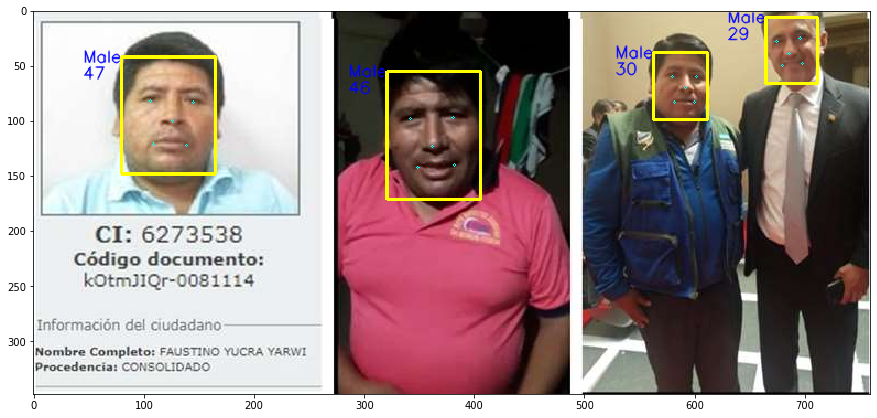

In [86]:
def draw_results(img, faces):

    or_image = img.copy()

    color_landmark = (0,255,255)
    color_gender = 255
    size = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    thickness = 1

    face_boxes = []

    for idx, face in enumerate(faces):
        if len(face.bbox) > 0:
            x,y,w,h = face.bbox.astype(np.int)
            
            age = face.age

            gender = 'Male'
            if face.gender==0:
                gender = 'Female'

            landmarks = face.landmark.astype(np.int)

            p1, p2, p3, p4, p5 = landmarks[0], landmarks[1], \
                                landmarks[2], landmarks[3], \
                                landmarks[4] 

            cv2.putText(img, str(gender) , (x-35, y+5), font, 0.5,(0,0,255),1,cv2.LINE_AA)
            cv2.putText(img, str(age) , (x-35, y+20), font, 0.5,(0,0,255),1,cv2.LINE_AA)

            cv2.circle(img, tuple(p1), 1, color_landmark)
            cv2.circle(img, tuple(p2), 1, color_landmark)
            cv2.circle(img, tuple(p3), 1, color_landmark)
            cv2.circle(img, tuple(p4), 1, color_landmark)
            cv2.circle(img, tuple(p5), 1, color_landmark)

            cv2.rectangle(img, (x,y), (w,h),(255,255,0),2)

            my_face_box = or_image[y:h,x:w]

            face_boxes.append(my_face_box)

    return img, face_boxes


image = img.copy()
image, face_boxes = draw_results(image, faces)

plt.figure(figsize=(15,10))
plt.imshow(image)

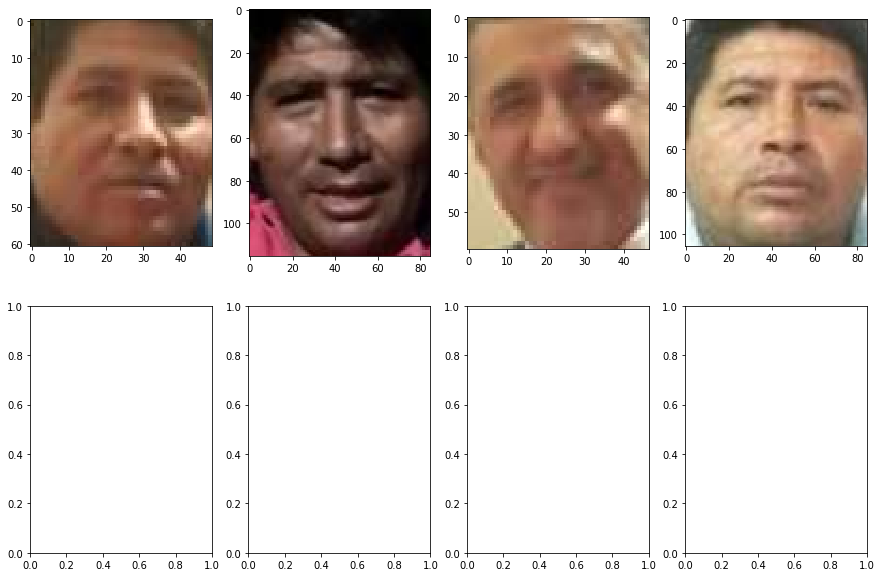

In [95]:
# for face in face_boxes:
#     print(face.shape)
#     plt.plot(x,y)
#     plt.figure(i+1)

# plt.show()
# #plt.imshow(face)

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(15,10))

for ax in axes.flatten():
    ax.axis('on')

for i, image in enumerate(face_boxes):
    axes[0,i].imshow(image)


plt.show()

# identification



In [59]:
model = insightface.model_zoo.get_model('arcface_r100_v1')


In [ ]:
model.prepare(ctx_id = -1)


In [105]:

def create_embeddings(faces_list):
    embeddings = []
    for i, face in enumerate(faces_list):
        face = cv2.resize(face, (112,112))
        emb = model.get_embedding(face)

        embeddings.append({"image_id": i, "embedding": emb, "image": face})

    return embeddings

In [106]:
embeedings = create_embeddings(face_boxes)

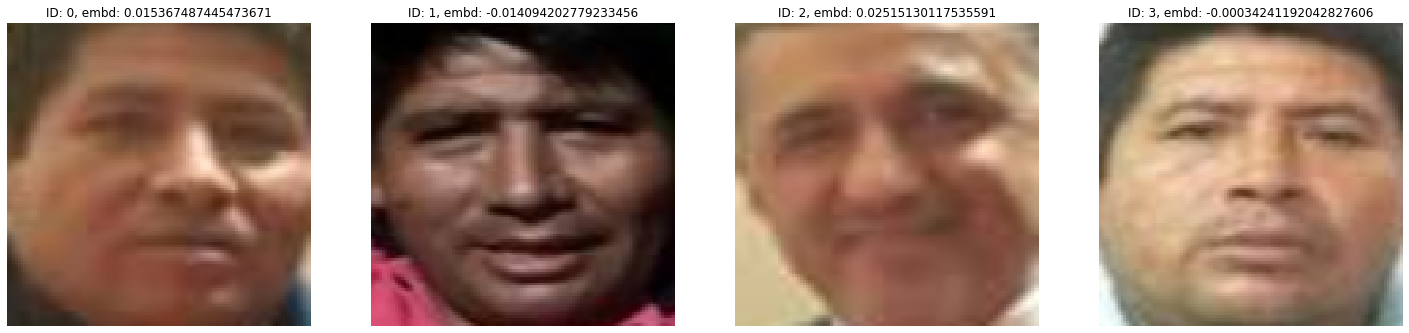

In [114]:
rows = 1

f = plt.figure(figsize=(25,10))

for num, x in enumerate(embeedings):
    emb = x["embedding"]
    image_id = x["image_id"]
    image = x["image"]
    
    plt.subplot(rows, 4, num+1, )
    plt.title(f"ID: {image_id}, embd: {np.mean(emb)}")
    plt.axis('off')

    plt.imshow(image)

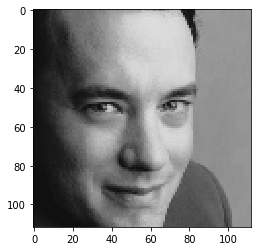

In [100]:
url = 'https://github.com/deepinsight/insightface/raw/master/deploy/Tom_Hanks_54745.png'
img = url_to_image(url)
plt.imshow(img)

In [101]:
img.shape

(112, 112, 3)